# 1. Importing all the necessary modules for our project

In [2]:
#import modules
import pandas as pd 
import numpy as np 
import pingouin as pg
import seaborn as sns 
import matplotlib.pyplot as plt 
from data_understanding import data_summary
import warnings
warnings.filterwarnings("ignore")

### 1.1 checking our data

In [3]:
path = "Test_set_values.csv"
Target_summary = data_summary(path)

First 5 rows of the DataFrame:

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB

Summary Statistics:


In [4]:
path_2 = "702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv"
Training_variables = data_summary(path_2)

First 5 rows of the DataFrame:

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  distri

In [5]:
path_3 = "4910797b-ee55-40a7-8668-10efd5c1b960.csv"
Training_values = data_summary(path_3)

First 5 rows of the DataFrame:

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  distri

##  2. Merging our target classes DataFrame  with training set DataFrame
We are using the id column to join the two DataFrames using the "inner" method 

In [13]:
df_1 = pd.read_csv("Test_set_values.csv", index_col= 0)
df_2 = pd.read_csv("4910797b-ee55-40a7-8668-10efd5c1b960.csv", index_col= 0)
df_3 = pd.read_csv("702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv", index_col= 0)

Checking if columns of our two data sets are similar

In [7]:
assert (df_2.columns  == df_3.columns).any()

In [8]:
#creating a join
water_data = pd.merge(df_1, df_2, on= "id", how= "inner")
#seeing the first five rowa
water_data.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


inspecting our new joined data frame

In [11]:
#
water_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   status_group           59400 non-null  object        
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55763 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59398 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  re

It seems we have a few columns containing missing data. We shall deal with that later, we go ahead and get the summary statistics for our numerical columns in our dataset

In [12]:
#getting summary statistics for our numeric columns
water_data.describe()

,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400
mean,317.650385,2012-03-29 09:11:33.818181888,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1970-01-01 00:00:00.000001300
min,0.000000,2002-10-14 00:00:00,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,1970-01-01 00:00:00
25%,0.000000,2011-04-01 00:00:00,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,1970-01-01 00:00:00
50%,0.000000,2012-10-10 00:00:00,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1970-01-01 00:00:00.000001986
75%,20.000000,2013-02-09 00:00:00,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,1970-01-01 00:00:00.000002004
max,350000.000000,2013-12-03 00:00:00,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,1970-01-01 00:00:00.000002013
std,2997.574558,NaN,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,NaN


In [25]:
#converting dates from objects to DateTime data types
water_data["construction_year"] = pd.to_datetime(water_data["construction_year"])
water_data["date_recorded"] = pd.to_datetime(water_data["date_recorded"])

# 3. Exploratory Data Analysis (EDA)
## dataset contains columns that almost have the same values. We are going to do exploratory analysis to further understand the behaviour of this data set. This analysis not only about determining which columns to drop but also get a deeper understanding of these coluns.

#### Knowing the  columns we are working with.

In [14]:
#getting columns
water_data.columns

Index(['status_group', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

### 3.1 Status_group 

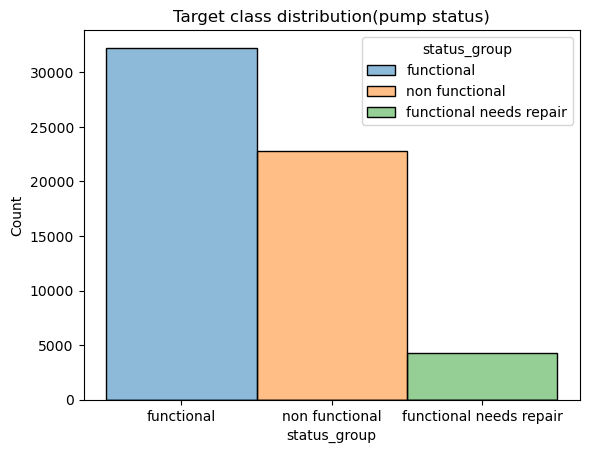

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64


In [24]:
## Status group distribution
sns.histplot(x = "status_group", data= water_data, hue= "status_group")
plt.title("Target class distribution(pump status)")
plt.show();
print(water_data["status_group"].value_counts())


#### we have three target groups functional, non functional and functional that needs repair. The functional group is the largest group with 32259 pumps working and the latter is the least with 4317pumps that need repair. The pumps that are non functional stand at 22824 pumps

### 3.2 amount_tsh - Total static head (amount water available to waterpoint)

In [37]:
sns.histplot(y= "amount_tsh", data= water_data , hue="amount_tsh");

In [33]:
water_data["amount_tsh"].value_counts()

amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: count, Length: 98, dtype: int64